In [2]:
import pandas as pd
import numpy as np
import seaborn 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

run RRLyrae v/s 
run other classifiers ()
run non biased dataset
run using features


# Classsification One-One (Biased dataset)

In [70]:
Data = pd.read_csv('Complete_Experiments.csv')
BiasedExperiments = Data[Data['biased']==True]
DropEasy = Data[Data['Drop Easier obs']==False]
ModifiedPrior = Data[Data['Modified Prior']==False]
nonModifiedPrior = Data[Data['Modified Prior']==False]

In [71]:
DropEasy.head()

,Unnamed: 0,Components,alpha,label1,label2,size_train,Sizetest,Marg. Likelihood,accuracy train full bayesian,accuracy test full bayesian,accuracy in train (ML),accuracy in test (ML),biased,Drop Easier obs,Modified Prior


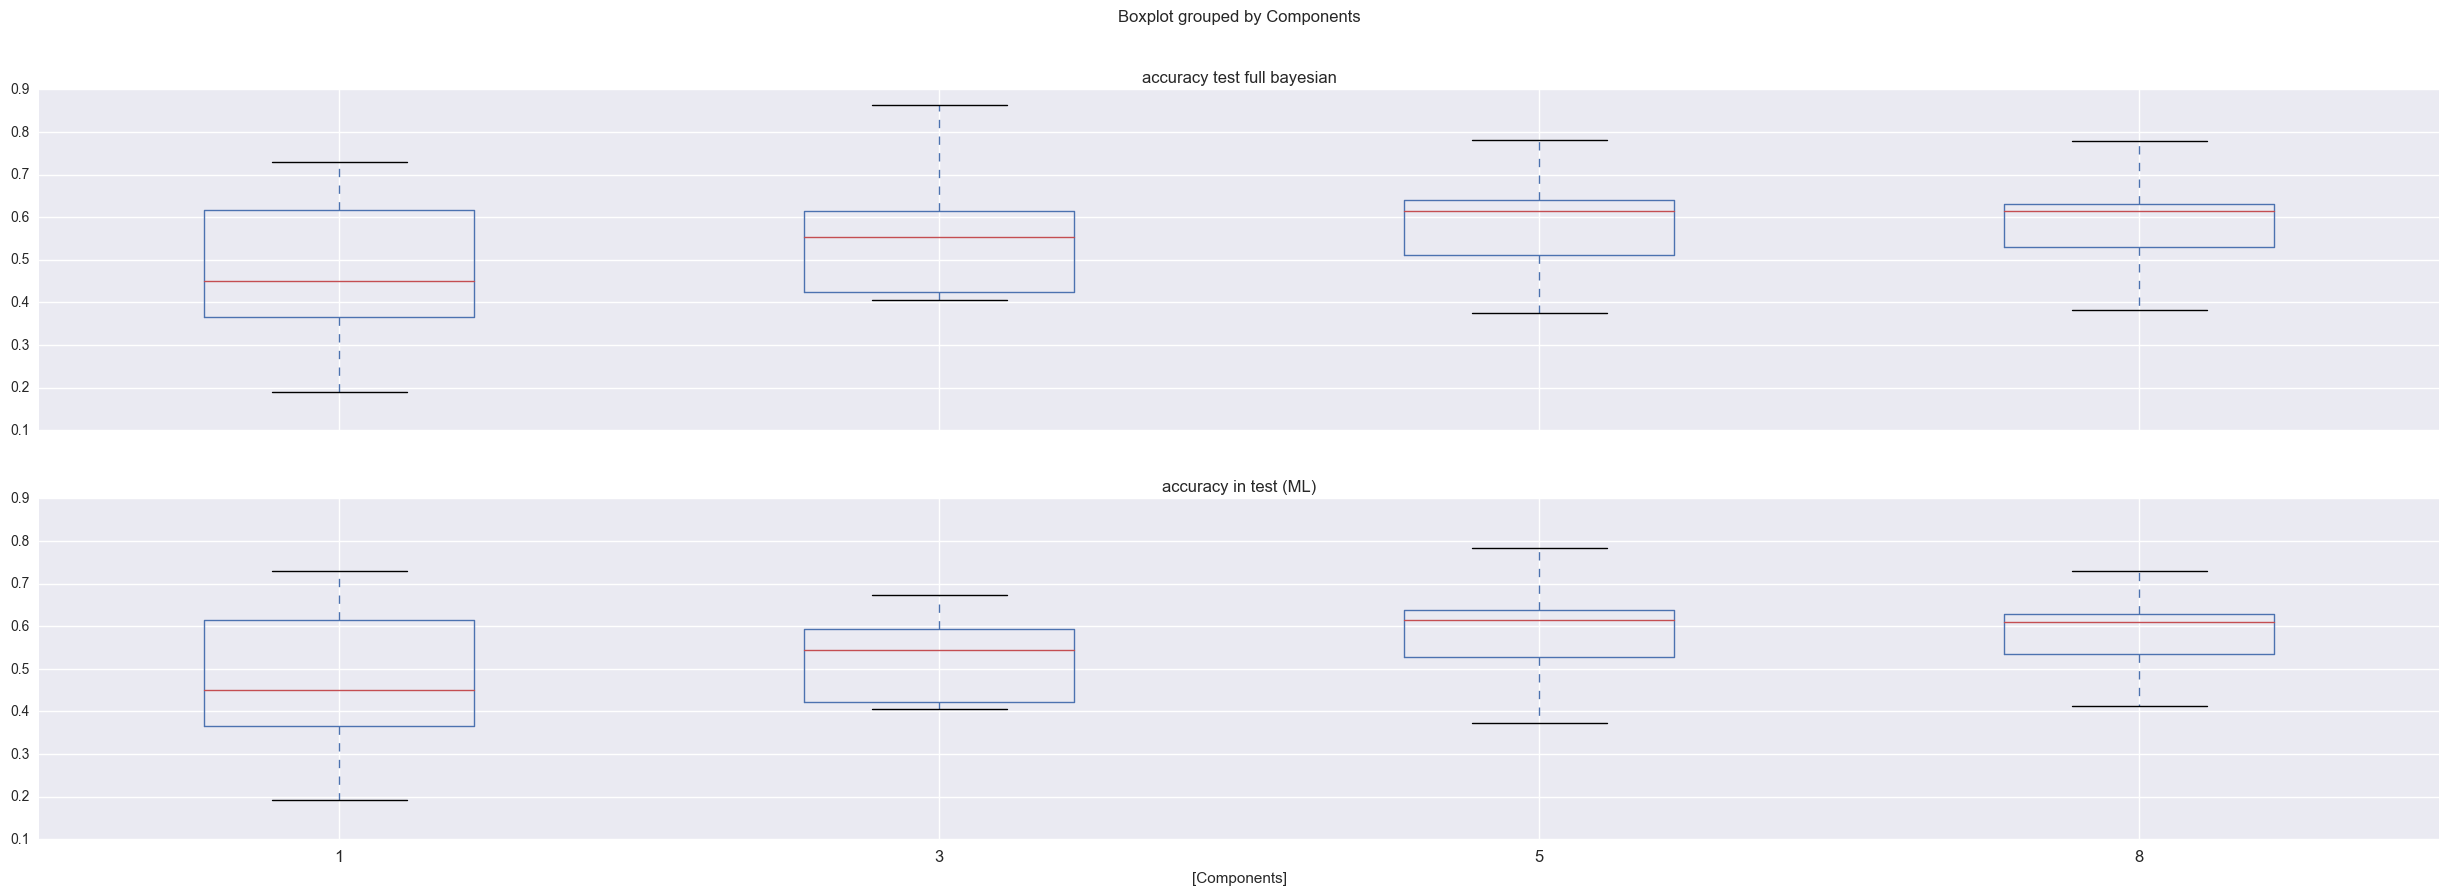

In [60]:
Data.boxplot(column=['accuracy test full bayesian','accuracy in test (ML)'], by= ['Components'], figsize = (30,10), layout = (2,1))
plt.show()

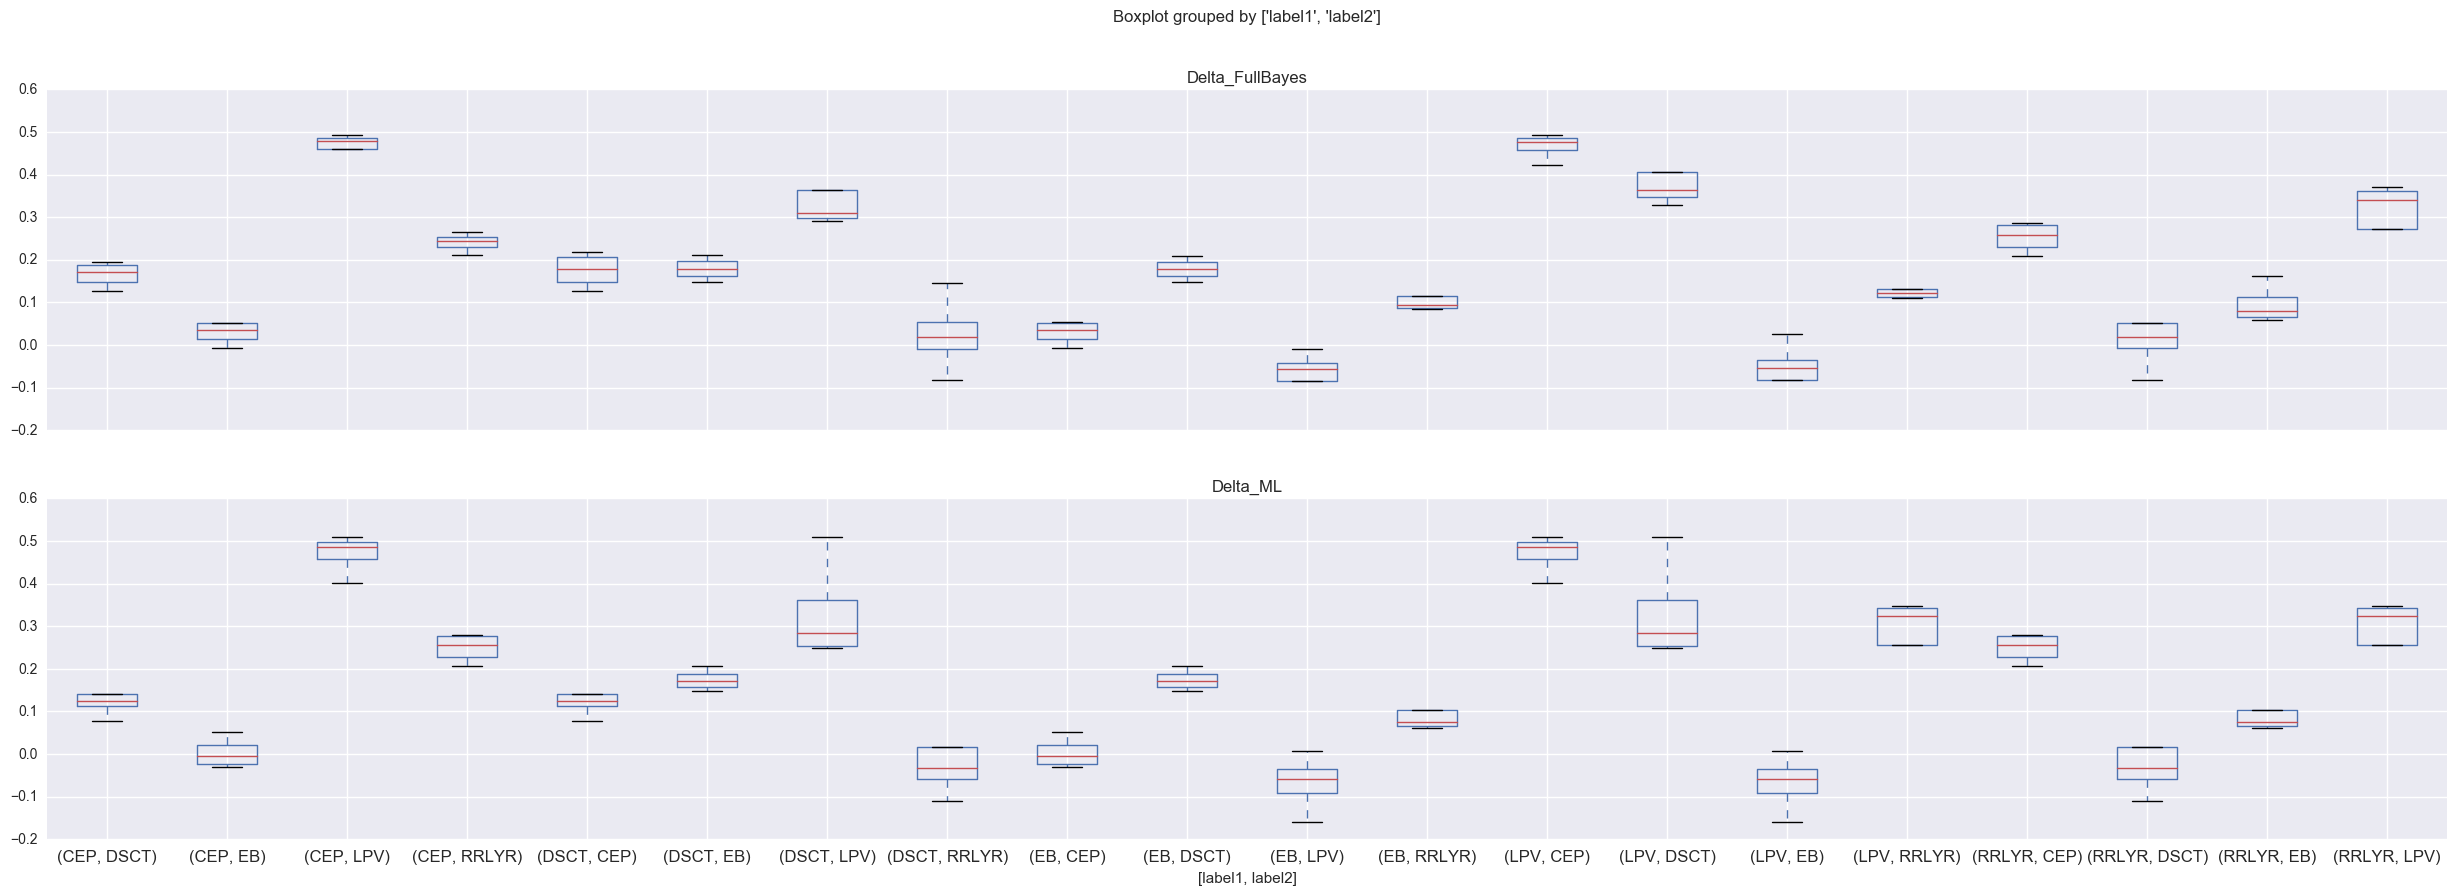

In [50]:
DataPlot = Data[Data['biased']==True]
DataPlot = DataPlot[DataPlot['Drop Easier obs']==True]
DataPlot = DataPlot[DataPlot['Modified Prior']==True]
DataPlot['Delta_FullBayes'] = DataPlot['accuracy train full bayesian'] - DataPlot['accuracy test full bayesian']
DataPlot['Delta_ML'] = DataPlot['accuracy in train (ML)'] - DataPlot['accuracy in test (ML)']
DataPlot.boxplot(column=['Delta_FullBayes','Delta_ML'], by= ['label1', 'label2'], figsize = (30,10), layout = (2,1))
plt.show()
#DataPlot.head()

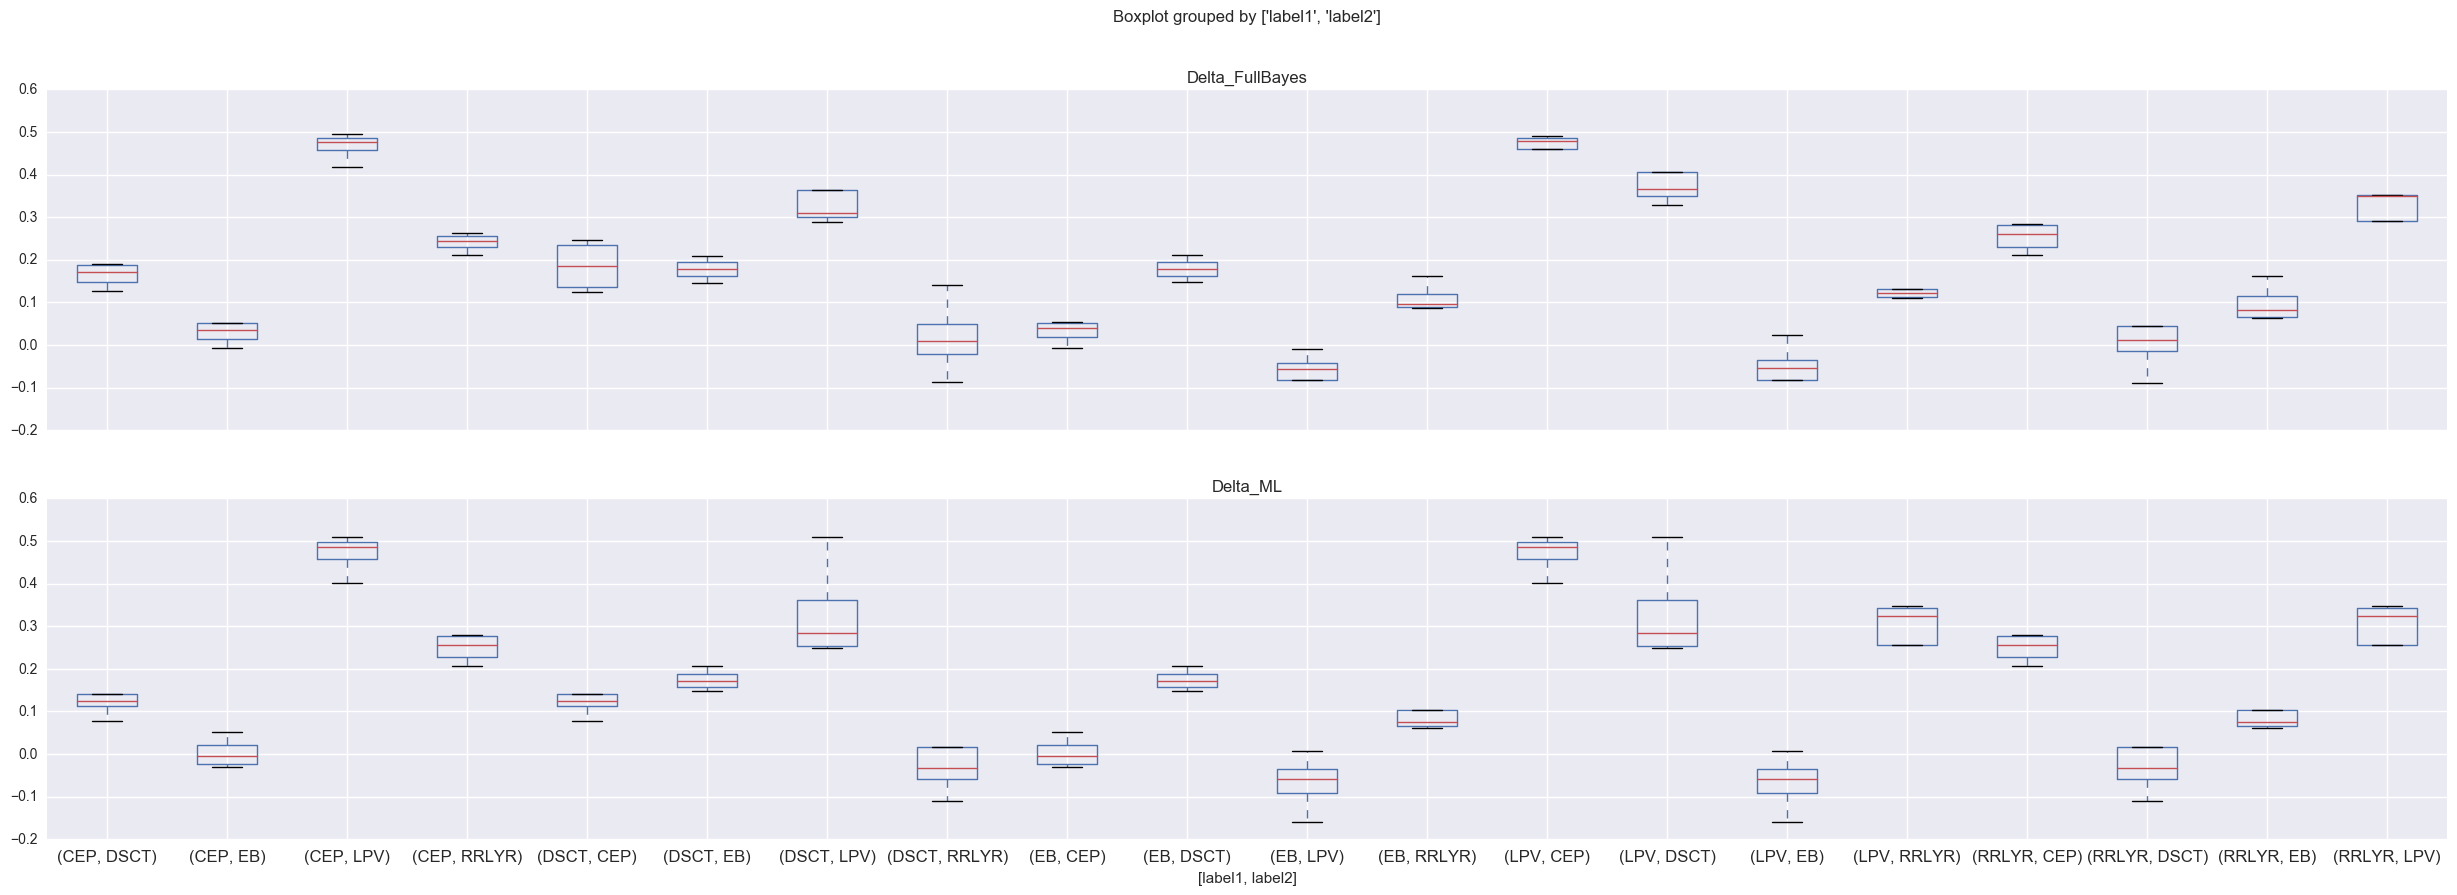

In [51]:
DataPlot = Data[Data['biased']==True]
DataPlot = DataPlot[DataPlot['Drop Easier obs']==True]
DataPlot = DataPlot[DataPlot['Modified Prior']==False]
DataPlot['Delta_FullBayes'] = DataPlot['accuracy train full bayesian'] - DataPlot['accuracy test full bayesian']
DataPlot['Delta_ML'] = DataPlot['accuracy in train (ML)'] - DataPlot['accuracy in test (ML)']
DataPlot.boxplot(column=['Delta_FullBayes','Delta_ML'], by= ['label1', 'label2'], figsize = (30,10), layout = (2,1))
plt.show()
#DataPlot.head()

In [8]:
BiasedExperiments.columns

Index(['Unnamed: 0', 'Components', 'alpha', 'label1', 'label2', 'size_train',
       'Sizetest', 'Marg. Likelihood', 'accuracy train full bayesian',
       'accuracy test full bayesian', 'accuracy in train (ML)',
       'accuracy in test (ML)', 'biased', 'Drop Easier obs', 'Modified Prior'],
      dtype='object')

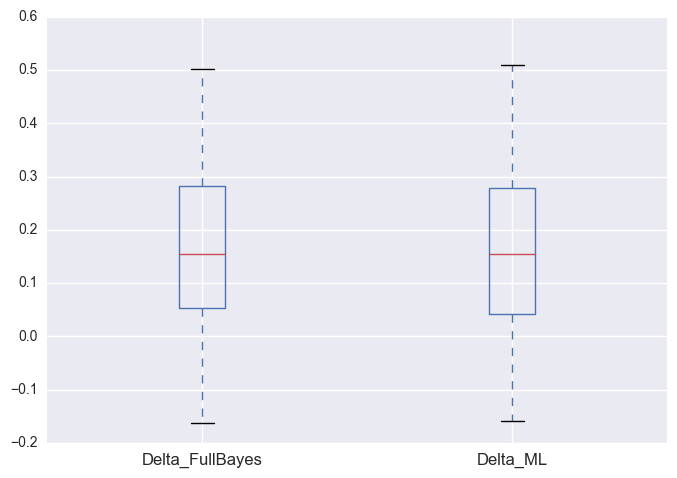

In [29]:
BiasedExperiments['Delta_FullBayes'] = BiasedExperiments['accuracy train full bayesian'] - BiasedExperiments['accuracy test full bayesian']
BiasedExperiments['Delta_ML'] = BiasedExperiments['accuracy in train (ML)'] - BiasedExperiments['accuracy in test (ML)']
BiasedExperiments.boxplot(column=['Delta_FullBayes','Delta_ML'])
plt.show()

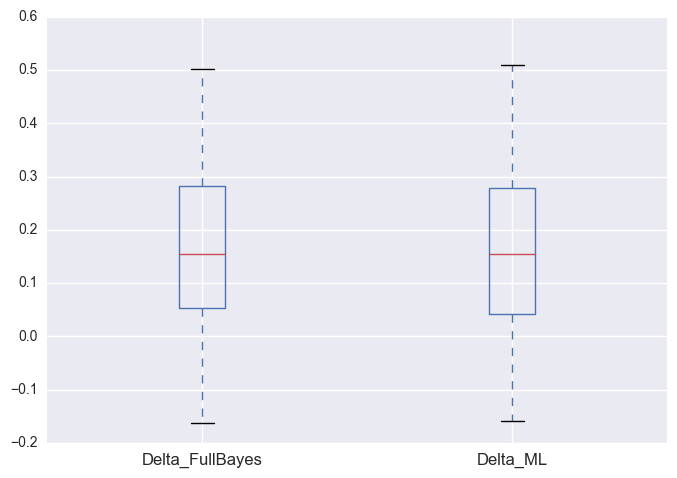

In [22]:
DropEasy['Delta_FullBayes'] = DropEasy['accuracy train full bayesian'] - DropEasy['accuracy test full bayesian']
DropEasy['Delta_ML'] = DropEasy['accuracy in train (ML)'] - DropEasy['accuracy in test (ML)']

DropEasy.boxplot(column=['Delta_FullBayes','Delta_ML'])
plt.show()

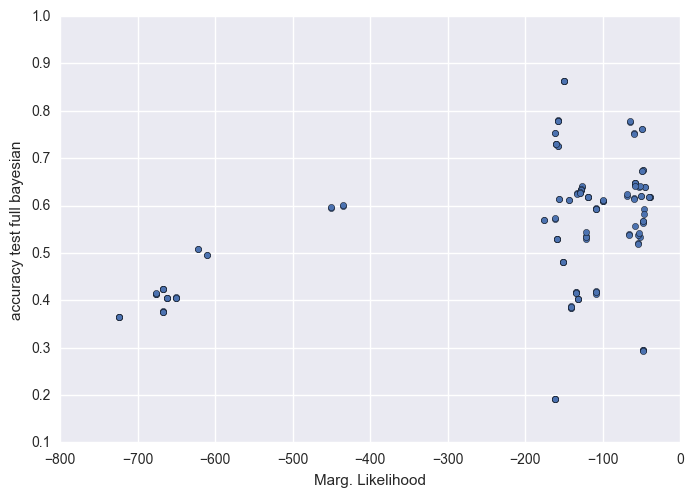

In [12]:
BiasedExperiments.plot.scatter(x='Marg. Likelihood', y='accuracy test full bayesian')
plt.show()

In [49]:
Data = pd.read_csv('RRc_ELL_components_VVV.csv')
Data

,Unnamed: 0,Components,alpha,label1,label2,size_train,Sizetest,Marg. Likelihood,accuracy train full bayesian,accuracy test full bayesian,accuracy in train (ML),accuracy in test (ML),biased,Drop Easier obs,Modified Prior
0,0,2,0.92,VVV_v3_RRc,VVV_v3_ELL,791,172,-517.315788,0.648546,0.627907,0.652361,0.628268,False,False,False
1,1,4,0.92,VVV_v3_RRc,VVV_v3_ELL,791,172,-527.119018,0.651075,0.627907,0.652361,0.628268,False,False,False
2,2,6,0.92,VVV_v3_RRc,VVV_v3_ELL,791,172,-530.560678,0.654867,0.622093,0.652361,0.628268,False,False,False
3,3,8,0.92,VVV_v3_RRc,VVV_v3_ELL,791,172,-533.876411,0.654867,0.627907,0.652361,0.628268,False,False,False
4,4,10,0.92,VVV_v3_RRc,VVV_v3_ELL,791,172,-539.752247,0.654867,0.627907,0.652361,0.628268,False,False,False
5,5,12,0.92,VVV_v3_RRc,VVV_v3_ELL,791,172,-541.613792,0.652339,0.622093,0.652361,0.628268,False,False,False


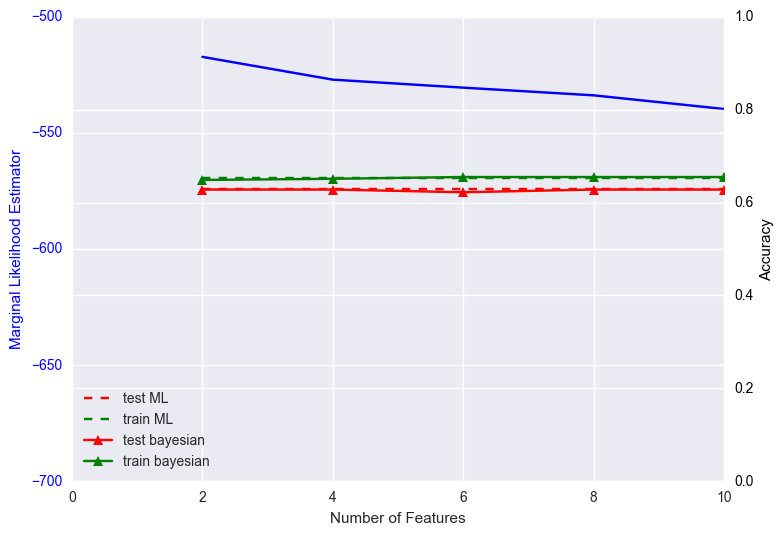

In [50]:
fig, ax1 = plt.subplots()
#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
ax1.plot(Data.Components, Data['Marg. Likelihood'], 'b-')
ax1.set_xlabel('Number of Features')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Marginal Likelihood Estimator', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(-700,-500)
ax2 = ax1.twinx()
ax2.set_ylim(0,1)
ax2.set_xlim(0,10)

#s2 = np.sin(2 * np.pi * t)
ax2.plot(Data.Components, Data['accuracy in test (ML)'], 'r--', label = 'test ML')
ax2.plot(Data.Components, Data['accuracy in train (ML)'], 'g--', label = 'train ML')
ax2.plot(Data.Components, Data['accuracy test full bayesian'], 'r-^', label = 'test bayesian')
ax2.plot(Data.Components, Data['accuracy train full bayesian'], 'g-^', label = 'train bayesian')
ax2.set_ylabel('Accuracy', color='black')
ax2.tick_params('y', colors='black')
legend = ax2.legend(loc='lower left', shadow=True)
fig.tight_layout()
plt.show()

In [68]:
Data = pd.read_csv('Size_delta_complete_OGLE_RL.csv')
Data


,Unnamed: 0,Components,alpha,label1,label2,size_train,Sizetest,Marg. Likelihood,accuracy train full bayesian,accuracy test full bayesian,accuracy in train (ML),accuracy in test (ML),biased,Drop Easier obs,Modified Prior
0,0,6,0.05,RRLYR,EB,99,1838,0,0,0,0.667576,0.519073,False,False,False
1,1,6,0.10,RRLYR,EB,197,1740,0,0,0,0.670000,0.537377,False,False,False
2,2,6,0.15,RRLYR,EB,300,1637,0,0,0,0.656659,0.621957,False,False,False
3,3,6,0.20,RRLYR,EB,406,1531,0,0,0,0.669742,0.648704,False,False,False
4,4,6,0.25,RRLYR,EB,507,1430,0,0,0,0.676627,0.646886,False,False,False
5,5,6,0.30,RRLYR,EB,615,1322,0,0,0,0.689237,0.625580,False,False,False
6,6,6,0.35,RRLYR,EB,717,1220,0,0,0,0.686043,0.627857,False,False,False
7,7,6,0.40,RRLYR,EB,796,1141,0,0,0,0.681063,0.652161,False,False,False
8,8,6,0.45,RRLYR,EB,899,1038,0,0,0,0.690807,0.666720,False,False,False
9,9,6,0.50,RRLYR,EB,995,942,0,0,0,0.695458,0.663648,False,False,False


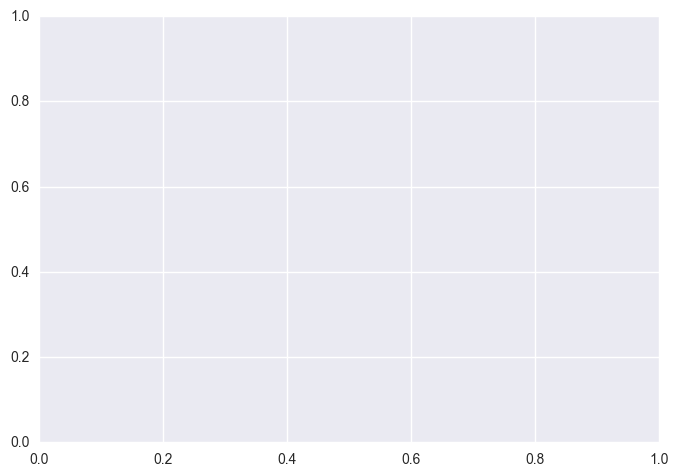

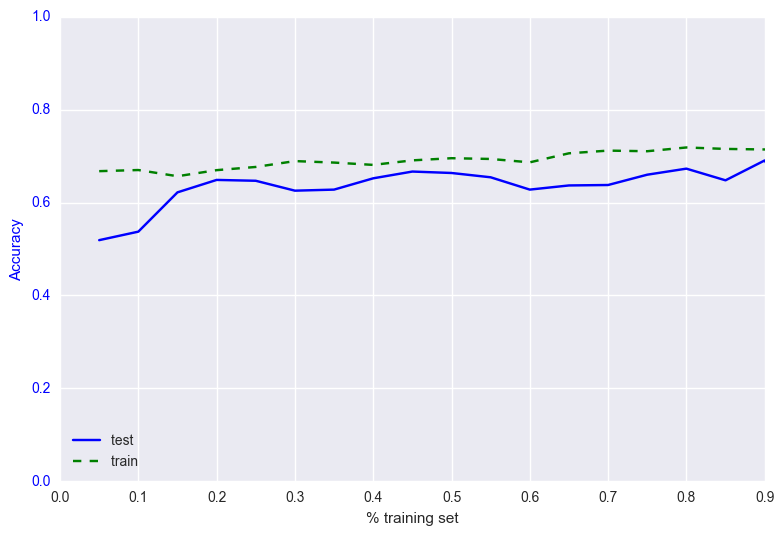

In [69]:
fig, ax1 = plt.subplots()
#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
ax1.plot(Data.alpha, Data['accuracy in test (ML)'], 'b-', label = 'test ')
ax1.plot(Data.alpha, Data['accuracy in train (ML)'], 'g--', label = 'train ')
ax1.set_xlabel('% training set')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,1)
ax1.set_xlim(0,0.9)

#s2 = np.sin(2 * np.pi * t)
legend = ax1.legend(loc='lower left', shadow=True)
fig.tight_layout()
plt.show()

In [13]:
Data = pd.read_csv('Size_delta_complete_VVV_RandomForest.csv')
Data


,Unnamed: 0,Components,alpha,label1,label2,size_train,Sizetest,Marg. Likelihood,accuracy train full bayesian,accuracy test full bayesian,accuracy in train (ML),accuracy in test (ML),biased,Drop Easier obs,Modified Prior
0,0,6,0.05,VVV_v3_RRc,VVV_v3_C,92,1734,0,0,0,0.796111,0.795866,False,False,False
1,1,6,0.10,VVV_v3_RRc,VVV_v3_C,171,1655,0,0,0,0.707925,0.682156,False,False,False
2,2,6,0.15,VVV_v3_RRc,VVV_v3_C,264,1562,0,0,0,0.796251,0.790026,False,False,False
3,3,6,0.20,VVV_v3_RRc,VVV_v3_C,339,1487,0,0,0,0.779501,0.674471,False,False,False
4,4,6,0.25,VVV_v3_RRc,VVV_v3_C,417,1409,0,0,0,0.776858,0.530862,False,False,False
5,5,6,0.30,VVV_v3_RRc,VVV_v3_C,512,1314,0,0,0,0.763725,0.662765,False,False,False
6,6,6,0.35,VVV_v3_RRc,VVV_v3_C,608,1218,0,0,0,0.745190,0.504979,False,False,False
7,7,6,0.40,VVV_v3_RRc,VVV_v3_C,697,1129,0,0,0,0.753136,0.562559,False,False,False
8,8,6,0.45,VVV_v3_RRc,VVV_v3_C,798,1028,0,0,0,0.771930,0.751966,False,False,False
9,9,6,0.50,VVV_v3_RRc,VVV_v3_C,874,952,0,0,0,0.780167,0.668125,False,False,False


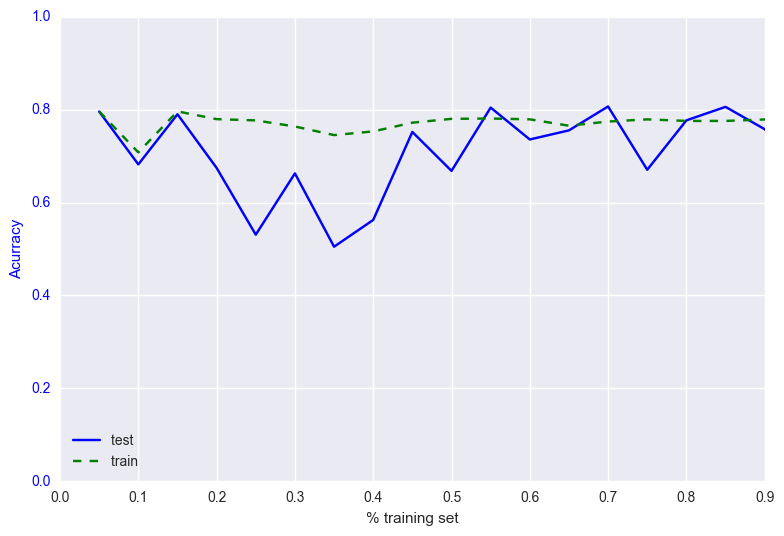

In [16]:
fig, ax1 = plt.subplots()
#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
ax1.plot(Data.alpha, Data['accuracy in test (ML)'], 'b-', label = 'test ')
ax1.plot(Data.alpha, Data['accuracy in train (ML)'], 'g--', label = 'train ')
ax1.set_xlabel('% training set')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Acurracy', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,1)
ax1.set_xlim(0,0.9)

#s2 = np.sin(2 * np.pi * t)
legend = ax1.legend(loc='lower left', shadow=True)
fig.tight_layout()
plt.show()

In [17]:
Data = pd.read_csv('Size_delta_complete_GAIA_RandomForest.csv')
Data

,Unnamed: 0,Components,alpha,label1,label2,size_train,Sizetest,Marg. Likelihood,accuracy train full bayesian,accuracy test full bayesian,accuracy in train (ML),accuracy in test (ML),biased,Drop Easier obs,Modified Prior
0,0,6,0.05,T2CEP,CEP,33,338,0,0,0,0.900000,0.858182,False,False,False
1,1,6,0.10,T2CEP,CEP,49,322,0,0,0,0.861667,0.875735,False,False,False
2,2,6,0.15,T2CEP,CEP,69,302,0,0,0,0.900000,0.910730,False,False,False
3,3,6,0.20,T2CEP,CEP,87,284,0,0,0,0.906944,0.897719,False,False,False
4,4,6,0.25,T2CEP,CEP,106,265,0,0,0,0.877576,0.868781,False,False,False
5,5,6,0.30,T2CEP,CEP,124,247,0,0,0,0.904254,0.883397,False,False,False
6,6,6,0.35,T2CEP,CEP,146,225,0,0,0,0.857143,0.857792,False,False,False
7,7,6,0.40,T2CEP,CEP,164,207,0,0,0,0.865196,0.903939,False,False,False
8,8,6,0.45,T2CEP,CEP,179,192,0,0,0,0.877451,0.895731,False,False,False
9,9,6,0.50,T2CEP,CEP,198,173,0,0,0,0.878772,0.908088,False,False,False


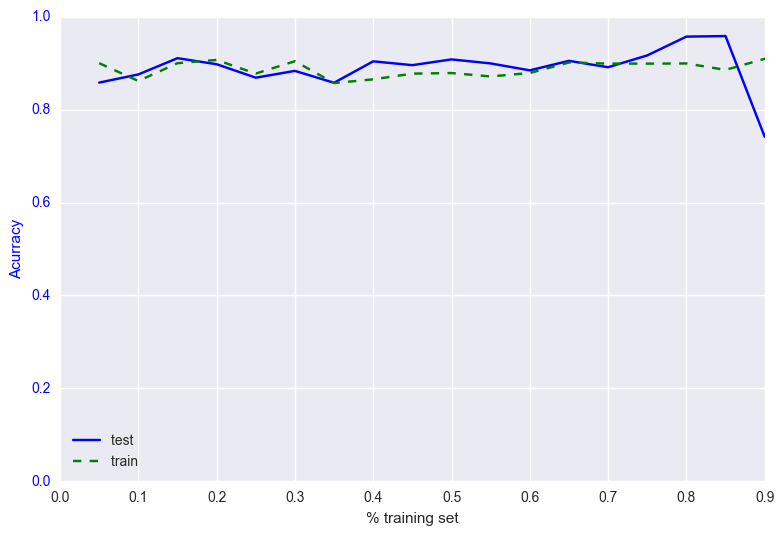

In [18]:
fig, ax1 = plt.subplots()
#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
ax1.plot(Data.alpha, Data['accuracy in test (ML)'], 'b-', label = 'test ')
ax1.plot(Data.alpha, Data['accuracy in train (ML)'], 'g--', label = 'train ')
ax1.set_xlabel('% training set')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Acurracy', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,1)
ax1.set_xlim(0,0.9)

#s2 = np.sin(2 * np.pi * t)
legend = ax1.legend(loc='lower left', shadow=True)
fig.tight_layout()
plt.show()

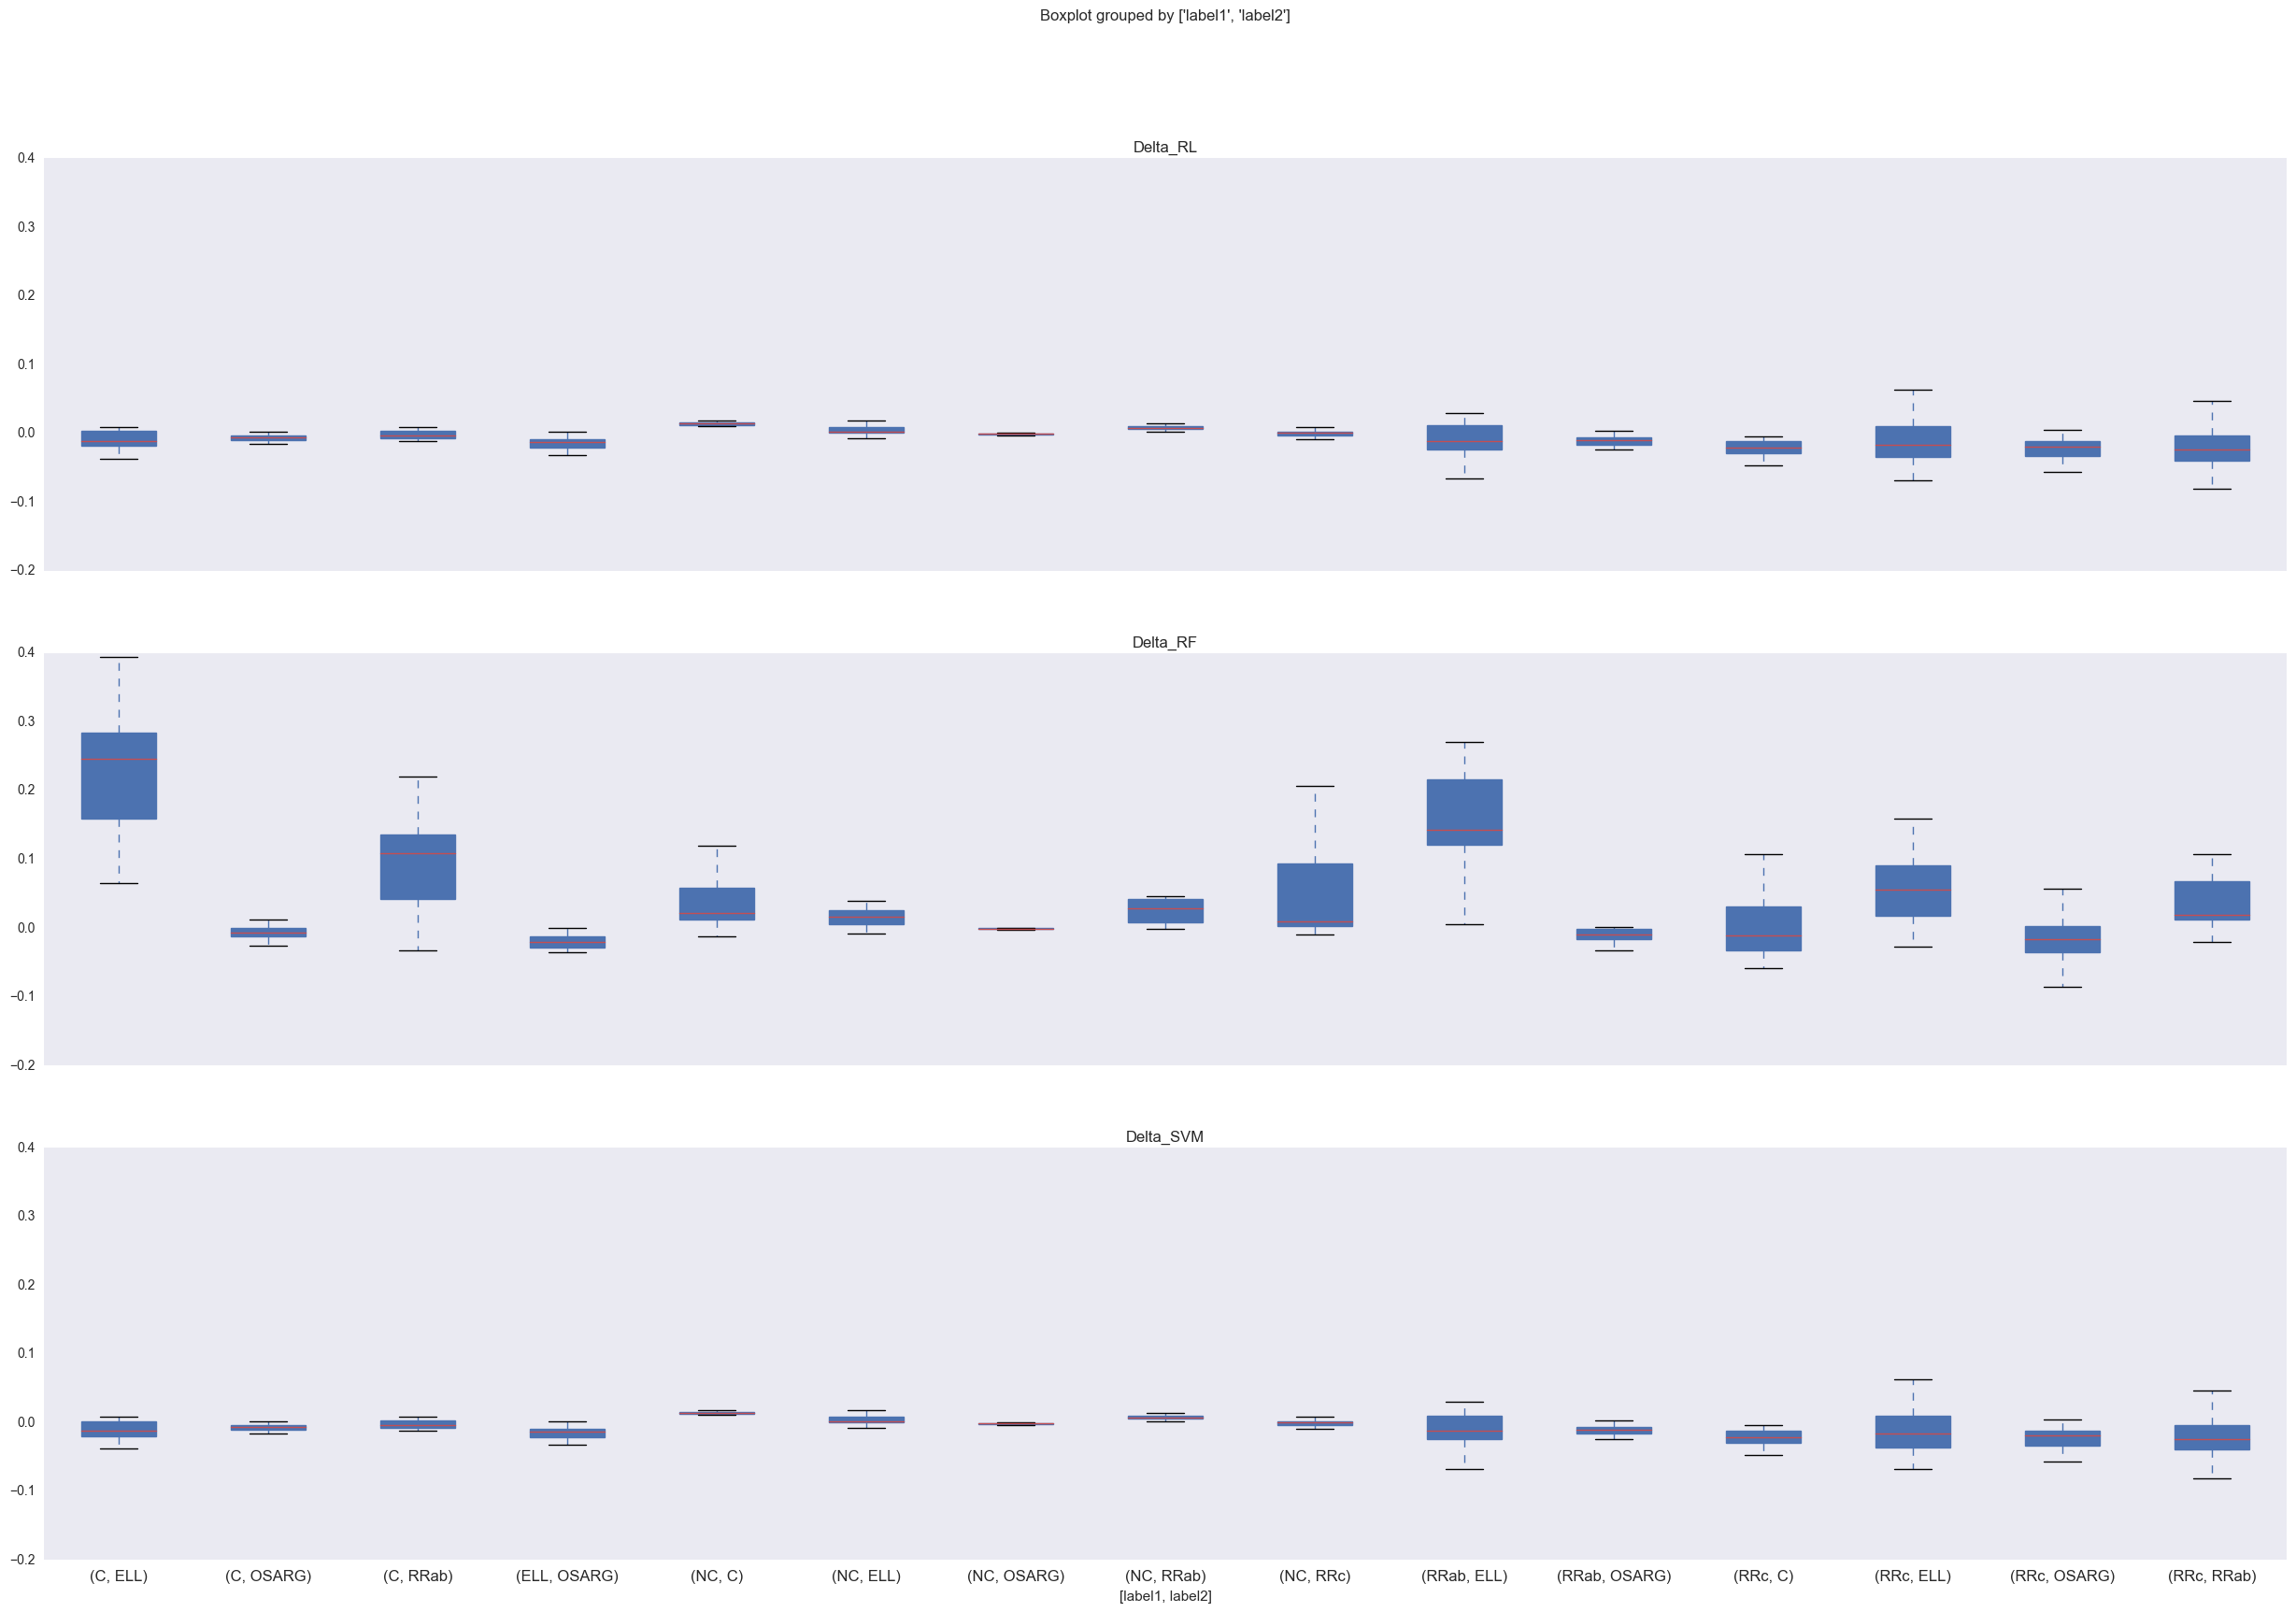

In [62]:
Data = pd.read_csv('Size_delta_complete_VVV_.csv')
Data['label1'] = Data['label1'].str.replace('VVV_v3_','')
Data['label2'] = Data['label2'].str.replace('VVV_v3_','')
Data.head()
DataPlot = Data
DataPlot['Delta_RL'] = DataPlot['accTrainRL'] - DataPlot['accTestRL']
DataPlot['Delta_SVM'] = DataPlot['accTrainSVM'] - DataPlot['accTestSVM']
DataPlot['Delta_RF'] = DataPlot['accTrainRF'] - DataPlot['accTestRF']
DataPlot.boxplot(column=['Delta_RL','Delta_RF','Delta_SVM'], by= ['label1', 'label2'], figsize = (30,20), layout = (3,1), patch_artist=True, grid= False)
plt.show()

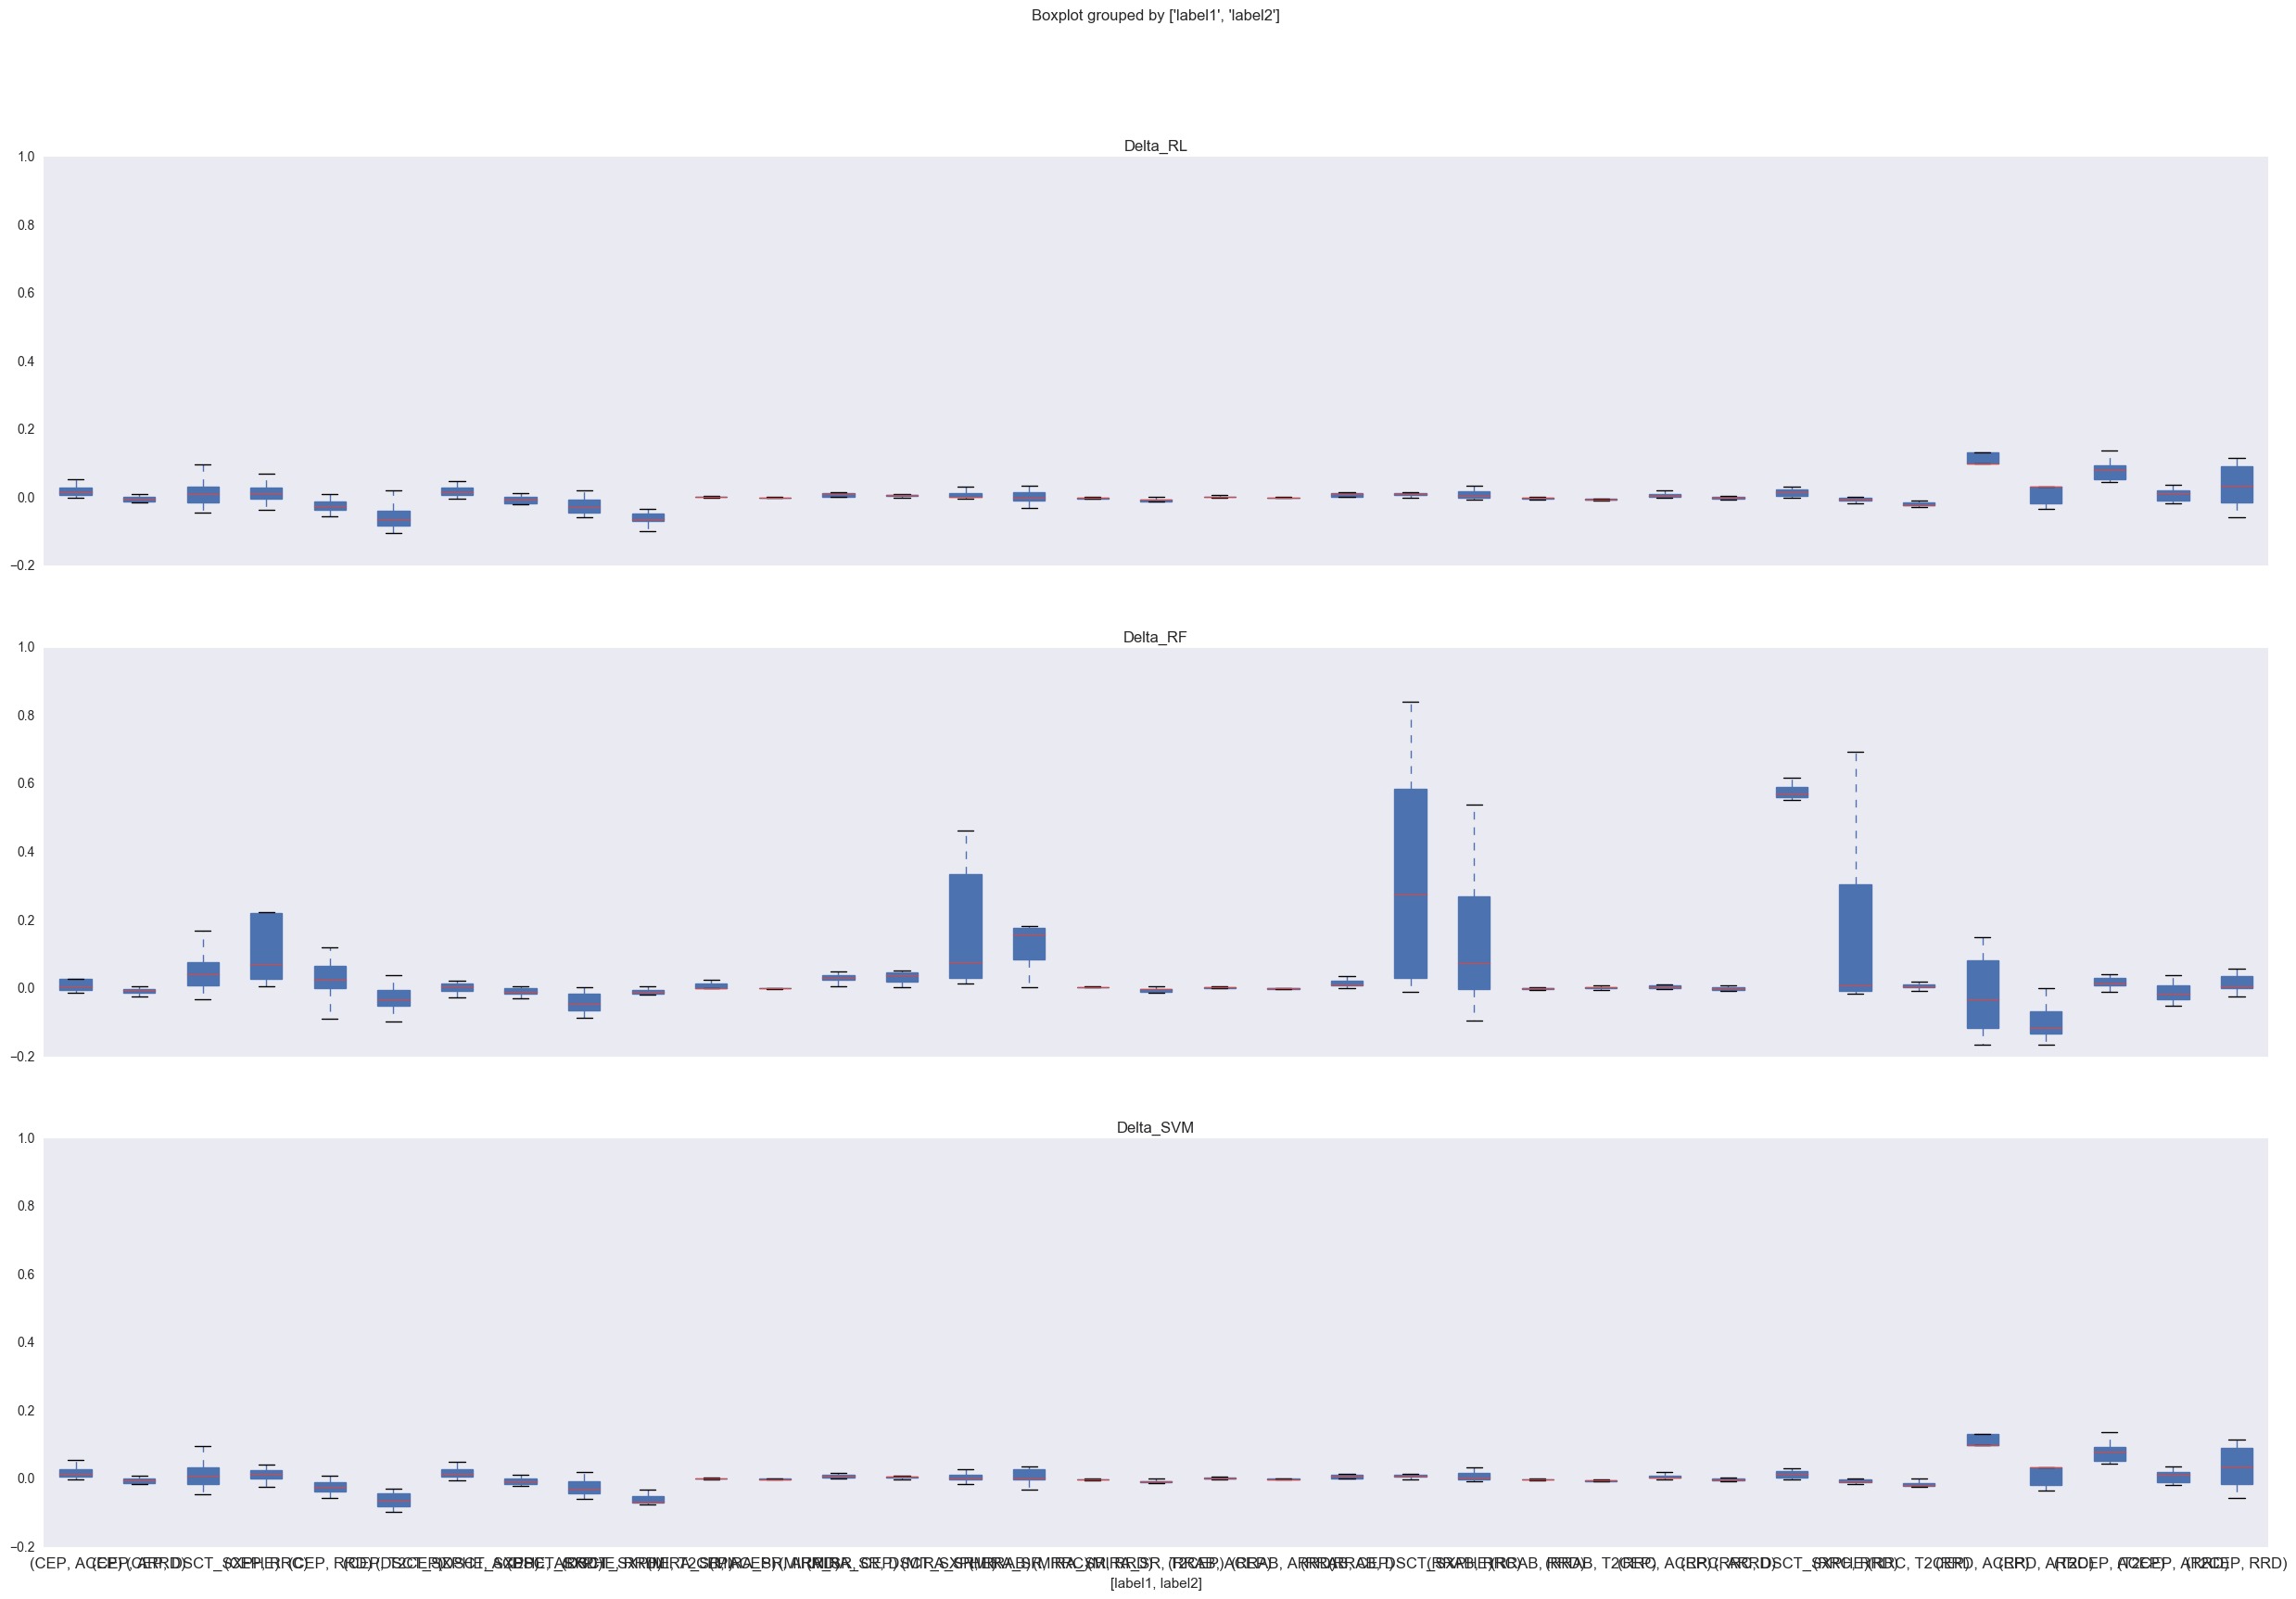

In [65]:
Data = pd.read_csv('Size_delta_complete_GAIA_RandomForest2.csv')
#Data['label1'] = Data['label1'].str.replace('VVV_v3_','')
#Data['label2'] = Data['label2'].str.replace('VVV_v3_','')
Data.head()
DataPlot = Data
DataPlot['Delta_RL'] = DataPlot['accTrainRL'] - DataPlot['accTestRL']
DataPlot['Delta_SVM'] = DataPlot['accTrainSVM'] - DataPlot['accTestSVM']
DataPlot['Delta_RF'] = DataPlot['accTrainRF'] - DataPlot['accTestRF']
DataPlot.boxplot(column=['Delta_RL','Delta_RF','Delta_SVM'], by= ['label1', 'label2'], figsize = (30,20), layout = (3,1), patch_artist=True, grid= False)
plt.show()

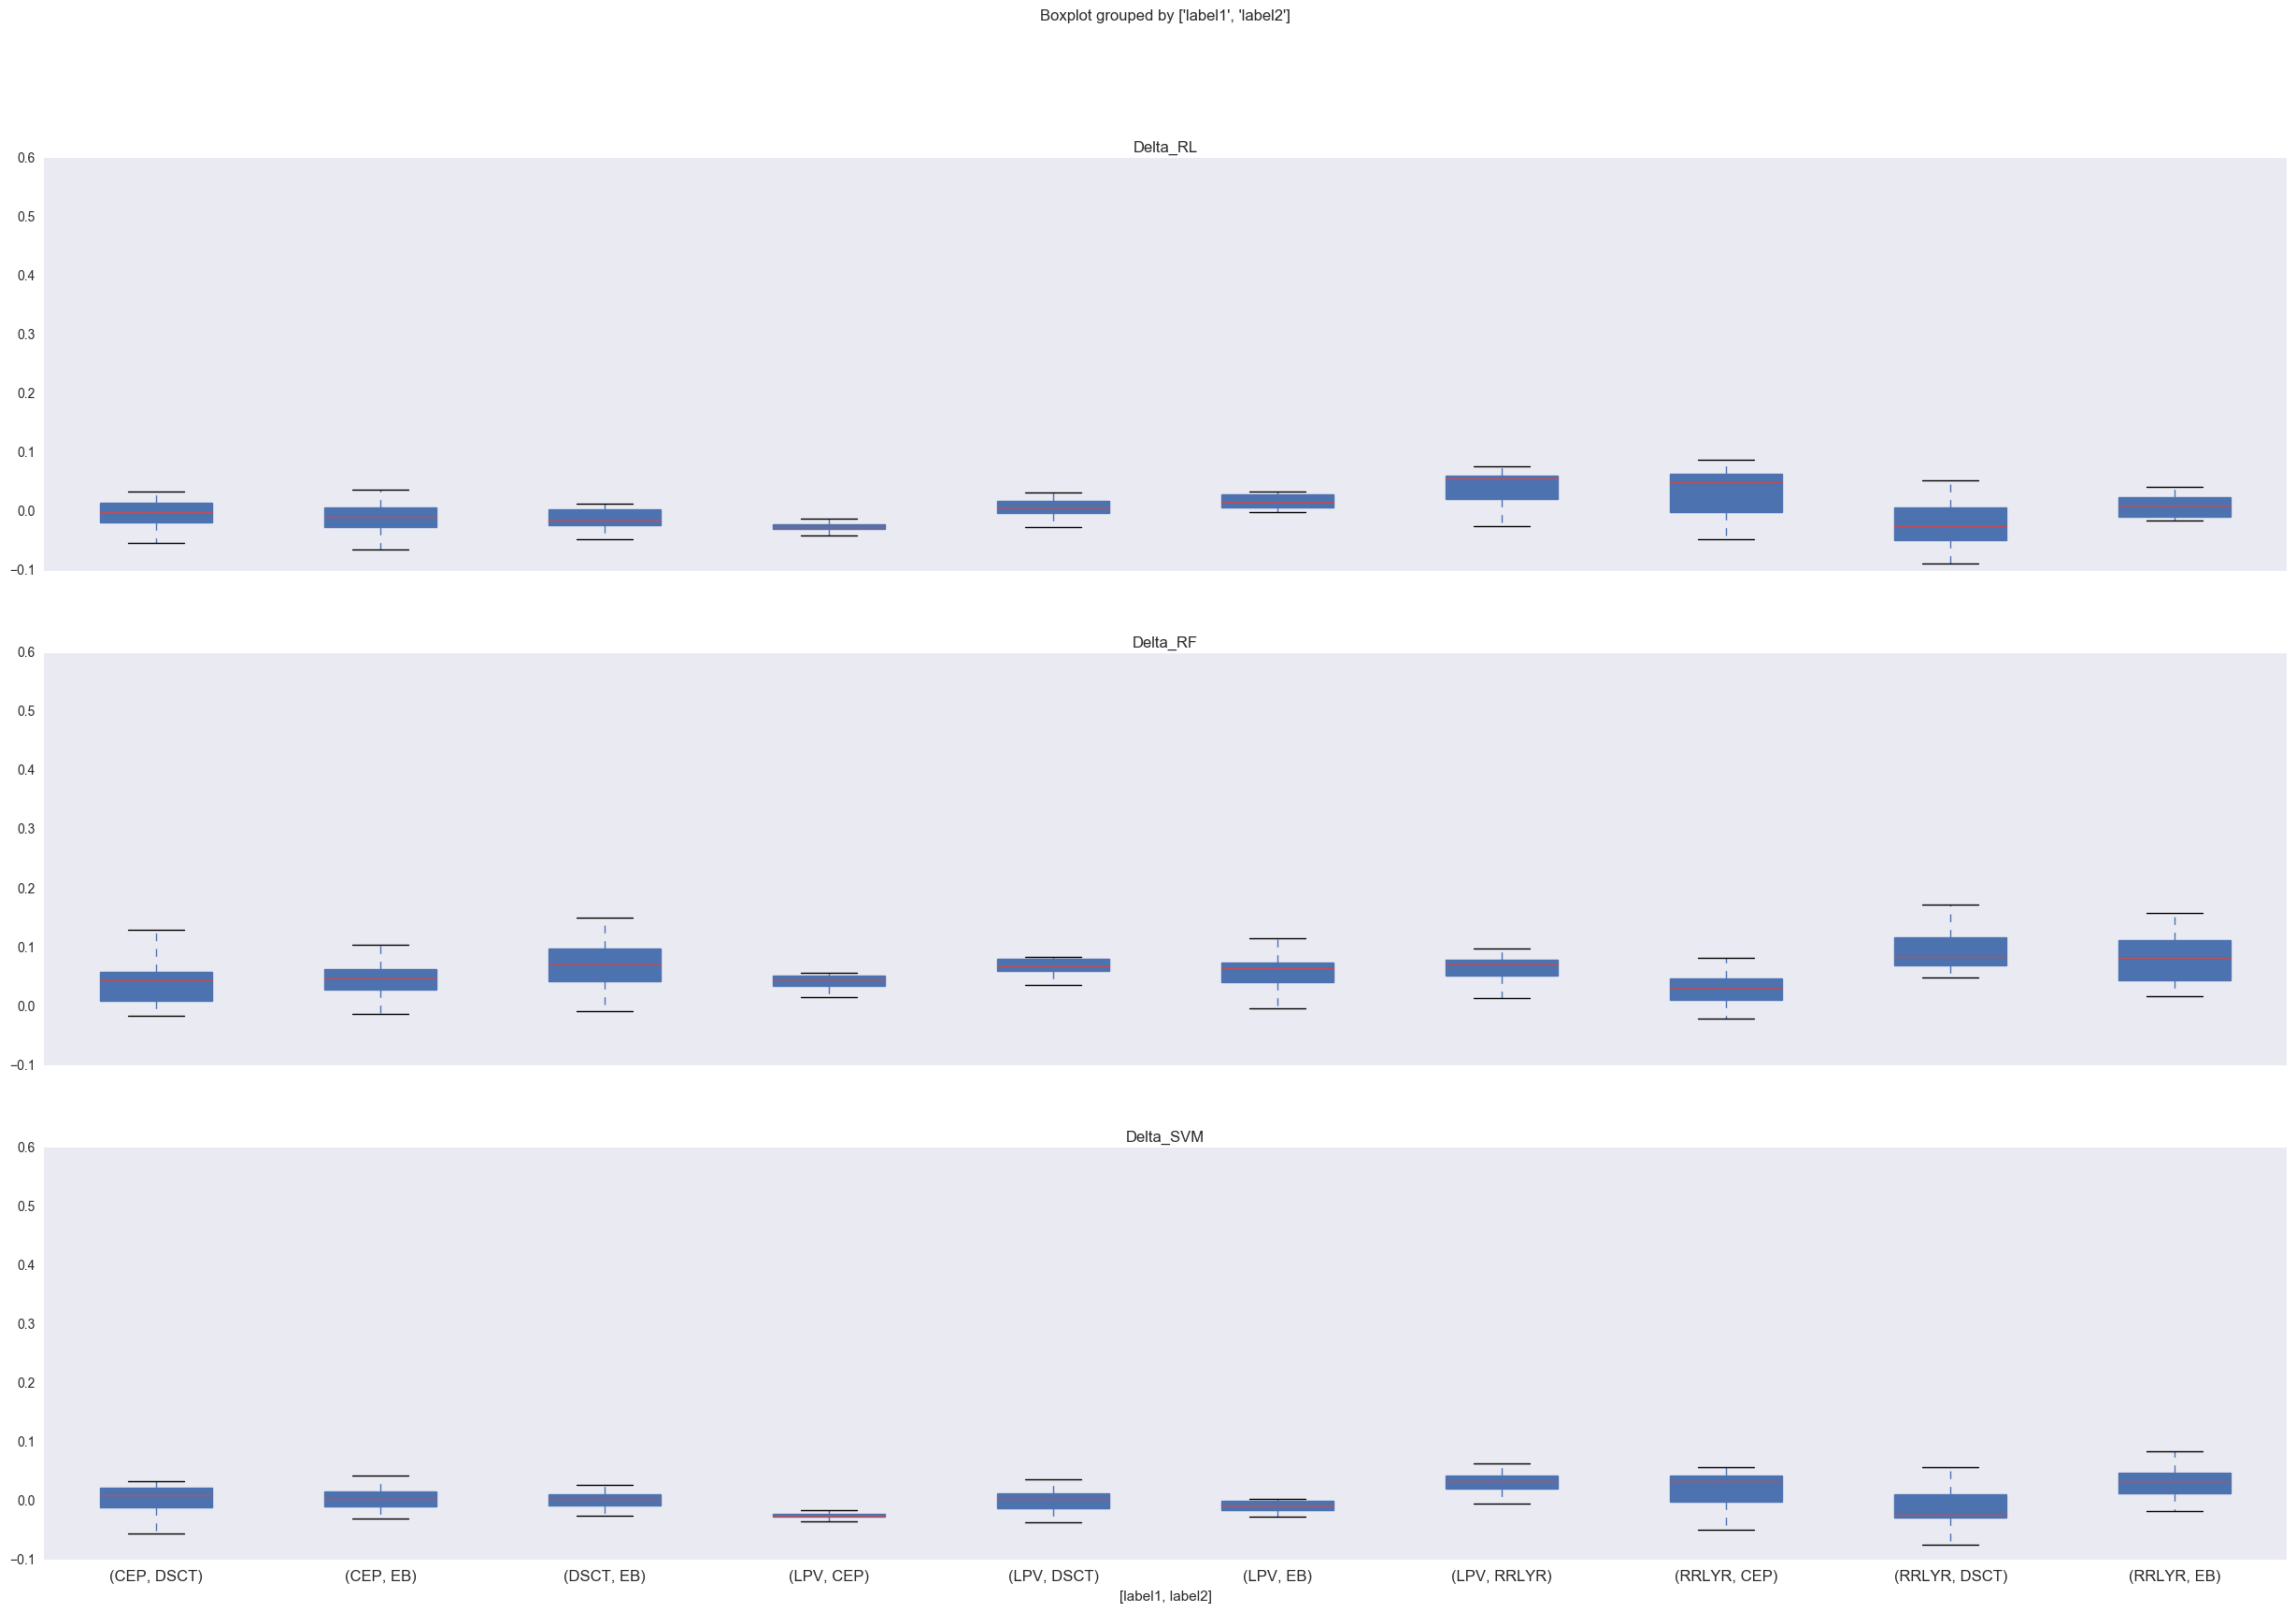

In [66]:
Data = pd.read_csv('Size_delta_complete_OGLE_.csv')
#Data['label1'] = Data['label1'].str.replace('VVV_v3_','')
#Data['label2'] = Data['label2'].str.replace('VVV_v3_','')
Data.head()
DataPlot = Data
DataPlot['Delta_RL'] = DataPlot['accTrainRL'] - DataPlot['accTestRL']
DataPlot['Delta_SVM'] = DataPlot['accTrainSVM'] - DataPlot['accTestSVM']
DataPlot['Delta_RF'] = DataPlot['accTrainRF'] - DataPlot['accTestRF']
DataPlot.boxplot(column=['Delta_RL','Delta_RF','Delta_SVM'], by= ['label1', 'label2'], figsize = (30,20), layout = (3,1), patch_artist=True, grid= False)
plt.show()